In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Processing 

In [26]:
df = pd.concat(
    [
        pd.read_csv('data/customer_churn_dataset-training-master.csv'),
        pd.read_csv('data/customer_churn_dataset-testing-master.csv')],axis=0)

In [27]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0
64370,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0
64371,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0
64372,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0


In [28]:
df[df.isna().any(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.dropna(inplace=True)
df.shape

(505206, 12)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505206 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 50.1+ MB


In [31]:
df.drop(columns='CustomerID',inplace=True)
df.columns = [col.lower().replace(' ','_') for col in df.columns]

In [32]:
conv_col = ['age', 'tenure', 'usage_frequency', 'support_calls', 'payment_delay', 'last_interaction', 'churn']
for col in conv_col:
    df[col] = df[col].astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505206 entries, 0 to 64373
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                505206 non-null  int32  
 1   gender             505206 non-null  object 
 2   tenure             505206 non-null  int32  
 3   usage_frequency    505206 non-null  int32  
 4   support_calls      505206 non-null  int32  
 5   payment_delay      505206 non-null  int32  
 6   subscription_type  505206 non-null  object 
 7   contract_length    505206 non-null  object 
 8   total_spend        505206 non-null  float64
 9   last_interaction   505206 non-null  int32  
 10  churn              505206 non-null  int32  
dtypes: float64(1), int32(7), object(3)
memory usage: 32.8+ MB


## Analysis

### Categorical Features 
[ age , subscription_type , contract_length ]


In [44]:
# create function 
def pie_chart(df, column):
    counts = df[column].value_counts()
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
    plt.figure(figsize=(10,8))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
    
    plt.title(f'Distribution of {column}')
    plt.show()

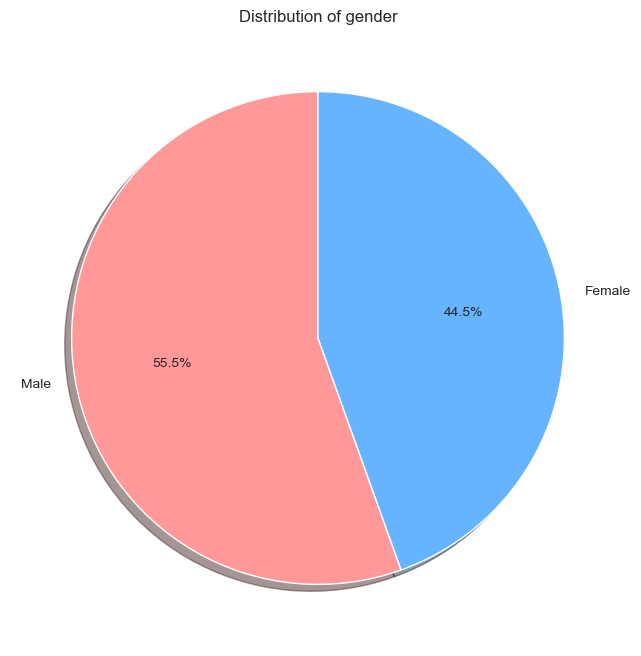

In [45]:
pie_chart(df,'gender')

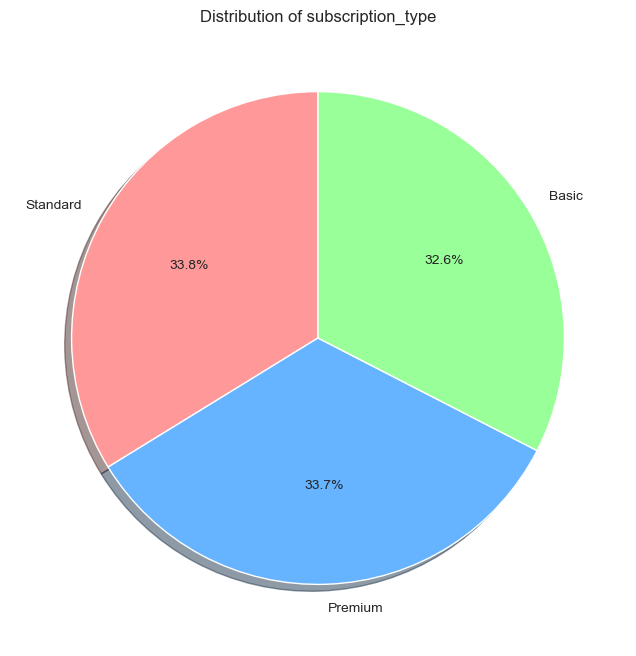

In [46]:
pie_chart(df,'subscription_type')

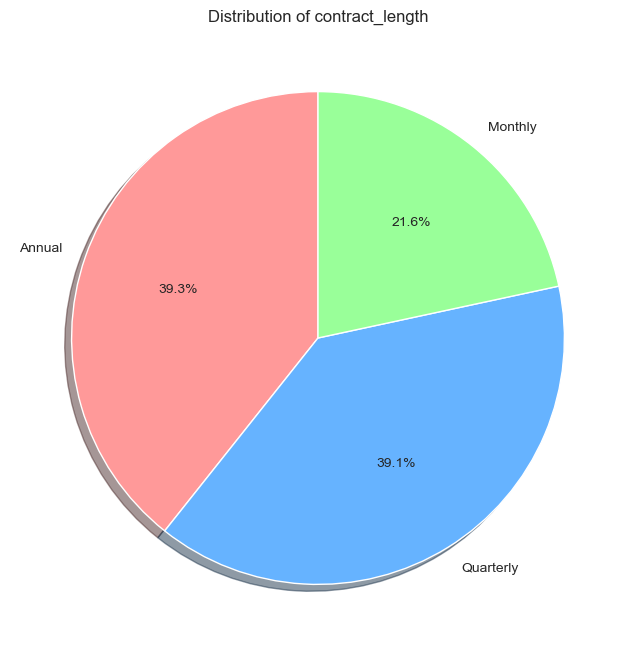

In [47]:
pie_chart(df,'contract_length')

In [50]:
filtered = df.copy()
filtered['churn_category'] = ['Churn' if x == 1.0 else 'Not Churn' for x in df['churn']]

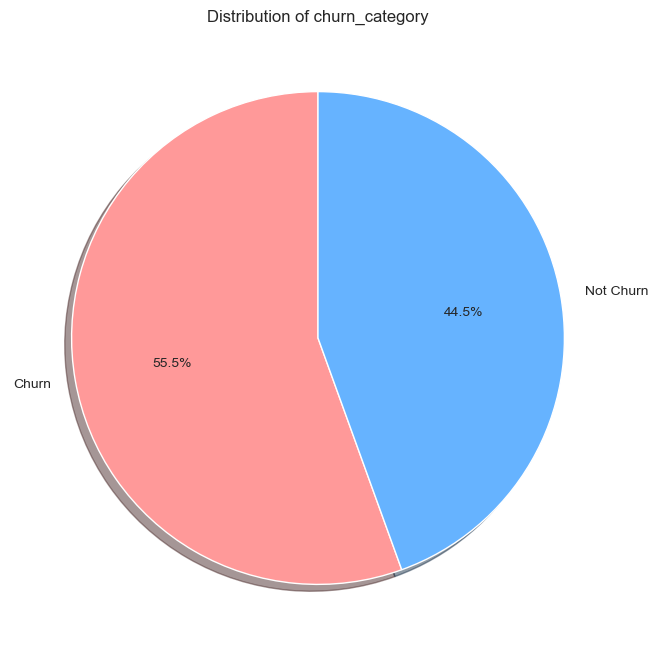

In [51]:
pie_chart(filtered,'churn_category')

### Discrete Features

In [56]:
# create function bar plot 
def bar_chart(df, target_feature, unit=''):
    plt.figure(figsize=(10, 5))
    value_counts = df[target_feature].value_counts()
    plt.bar(value_counts.index, value_counts.values)
    
    plt.xlabel(f'{target_feature.capitalize()} {unit}')
    plt.ylabel('Frequency')
    plt.title(f"Distribution of Customer's {target_feature.capitalize()}\n")
    plt.grid(axis='y')
    plt.show()

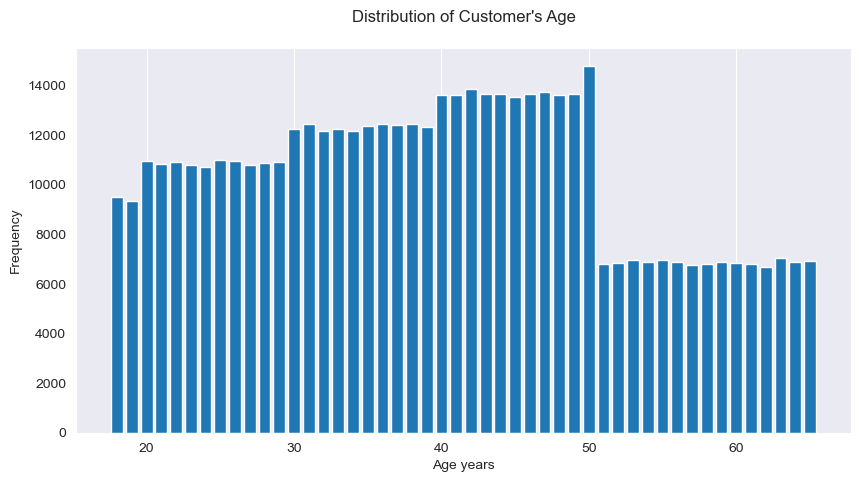

In [57]:
bar_chart(df, 'age', unit='years')

In [58]:
# create function box plot
def box_chart(df, feature):
    plt.figure(figsize=(10, 5))
    sns.boxplot(df, x = feature)
    plt.title(f'Distribution of {feature}\n')
    plt.xlabel(feature)
    plt.ylabel('Values')
    plt.show()

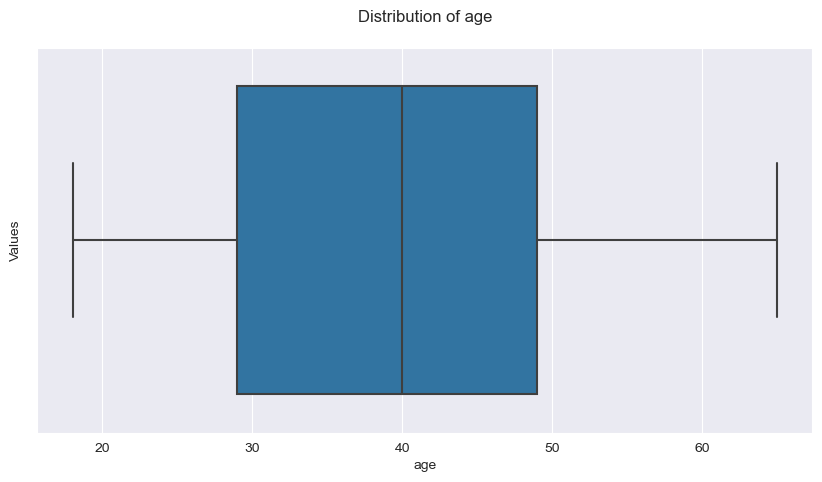

In [59]:
box_chart(df, 'age')

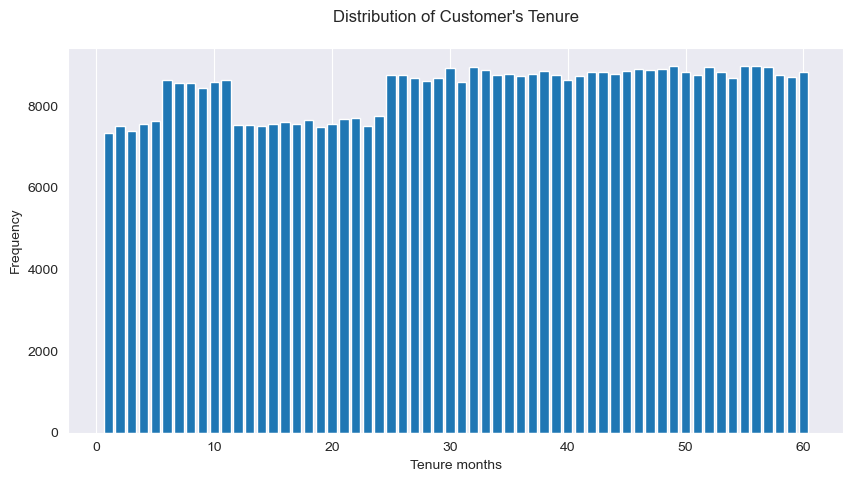

In [60]:
bar_chart(df, 'tenure', unit='months')

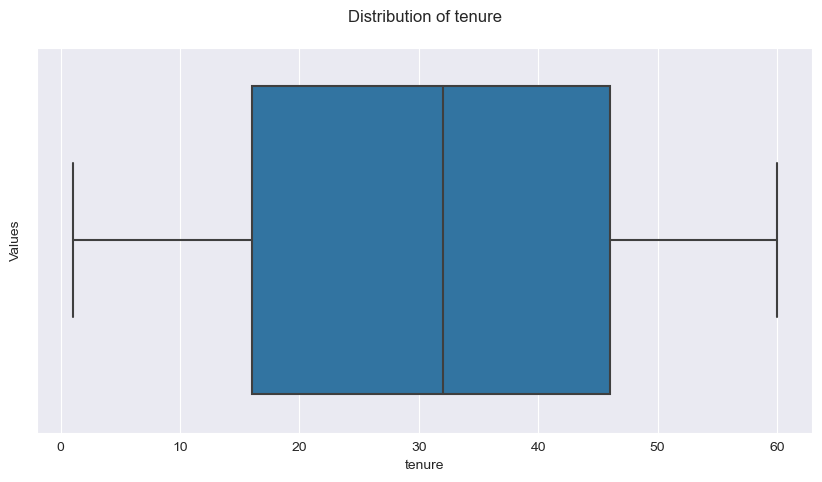

In [61]:
box_chart(df, 'tenure')

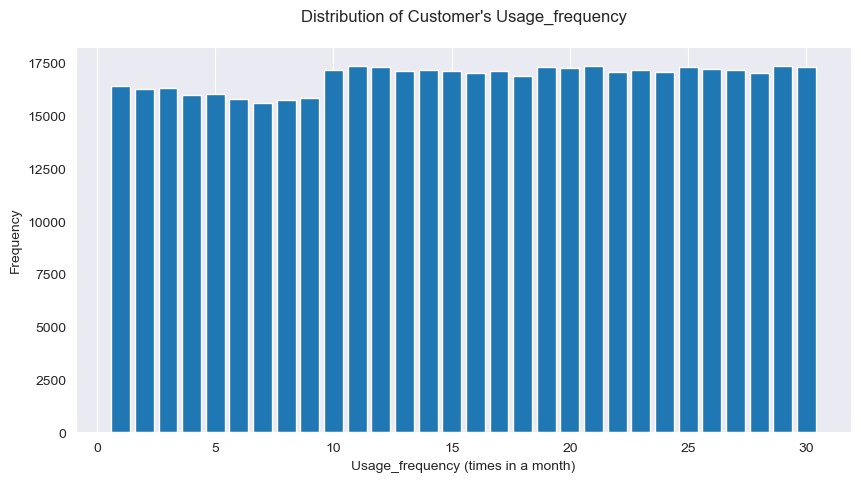

In [64]:
bar_chart(df, 'usage_frequency', unit='(times in a month)')

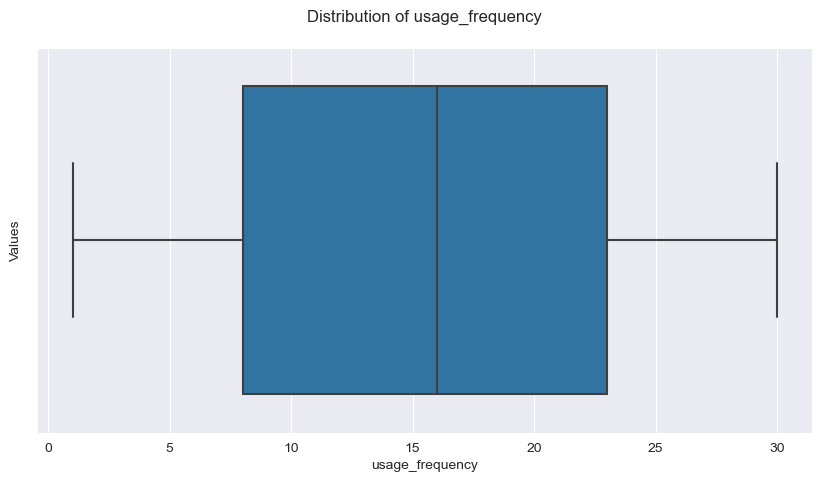

In [65]:
box_chart(df, 'usage_frequency')

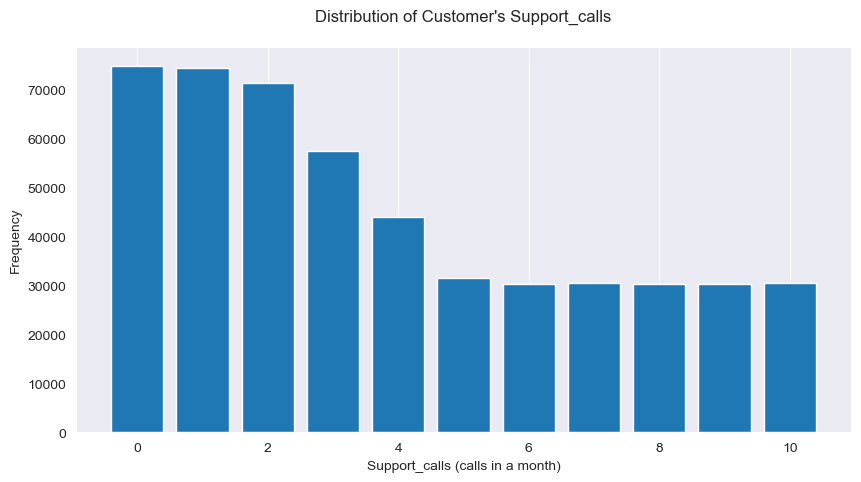

In [66]:
bar_chart(df,'support_calls', unit='(calls in a month)')

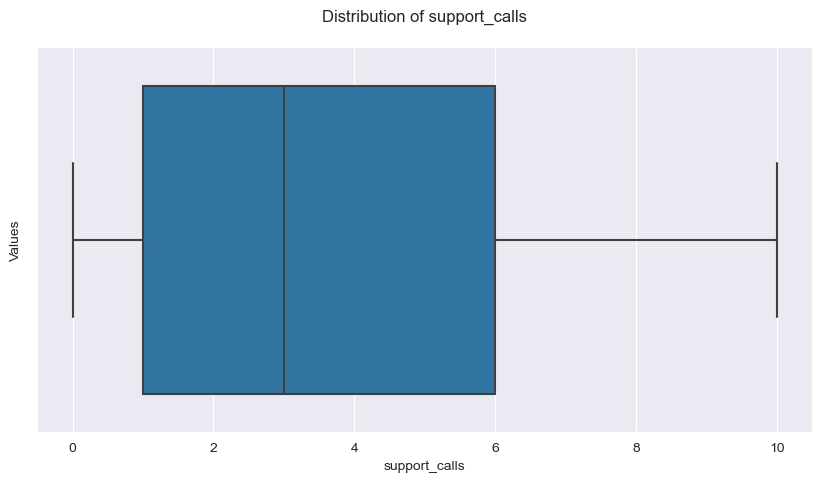

In [67]:
box_chart(df, 'support_calls')

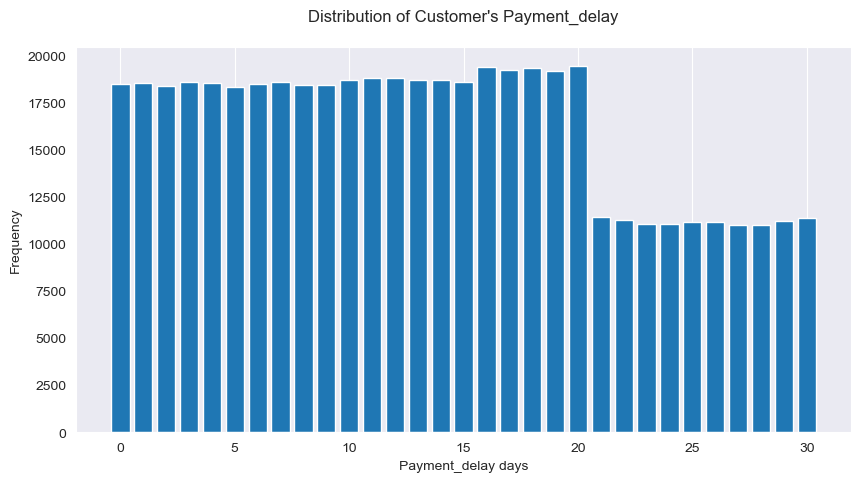

In [68]:
bar_chart(df, 'payment_delay', unit='days')

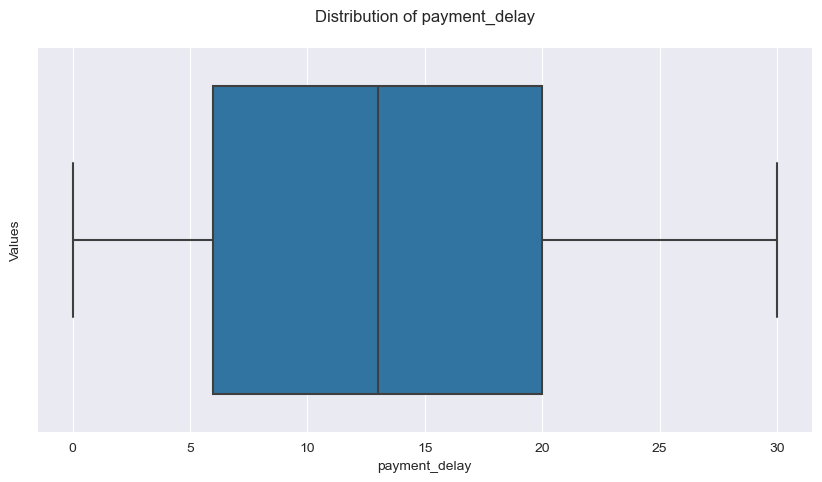

In [69]:
box_chart(df, 'payment_delay')

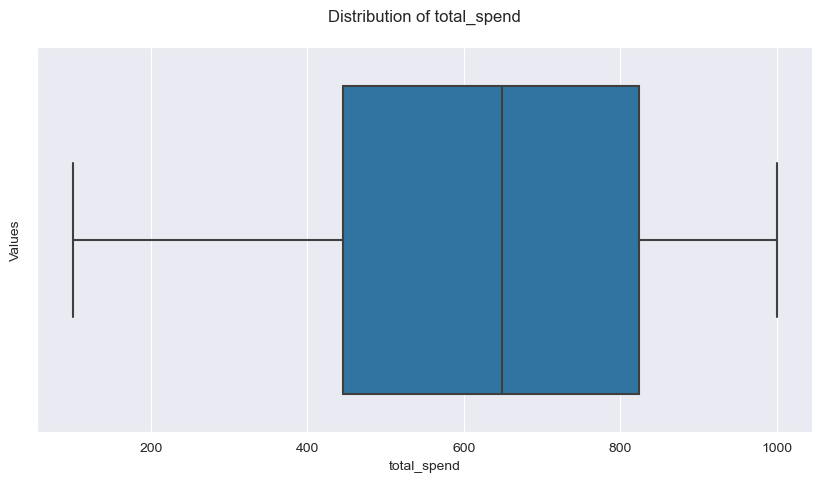

In [70]:
box_chart(df, 'total_spend')

In [73]:
gender_churn = df.groupby(['gender','churn']).size().unstack()
gender_churn

churn,0,1
gender,,
Female,78964,145969
Male,145750,134523


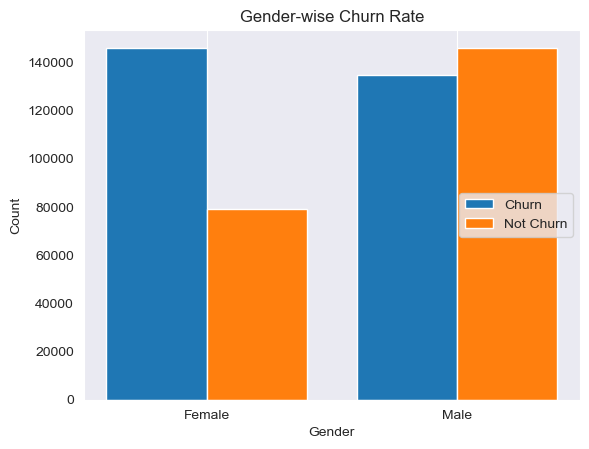

In [80]:
def plot_with_churn(feature):
    X = feature.index
    churn_0 = feature.iloc[:, 0]
    churn_1 = feature.iloc[:, 1]
    X_axis = np.arange(len(X))

    plt.bar(X_axis - 0.2, churn_1, 0.4, label='Churn')
    plt.bar(X_axis + 0.2, churn_0, 0.4, label='Not Churn')

    plt.xticks(X_axis, X)
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.title("Gender-wise Churn Rate")
    plt.legend(loc='center right')
    plt.grid(axis='y')
    
    plt.show()

plot_with_churn(gender_churn)

In [81]:
filtered = df.groupby(['payment_delay','churn']).size().unstack()
filtered

churn,0,1
payment_delay,,
0,10456,8042
1,10620,7940
2,10322,8031
3,10472,8096
4,10518,8008
5,10352,7960
6,10444,8051
7,10512,8054
8,10338,8113


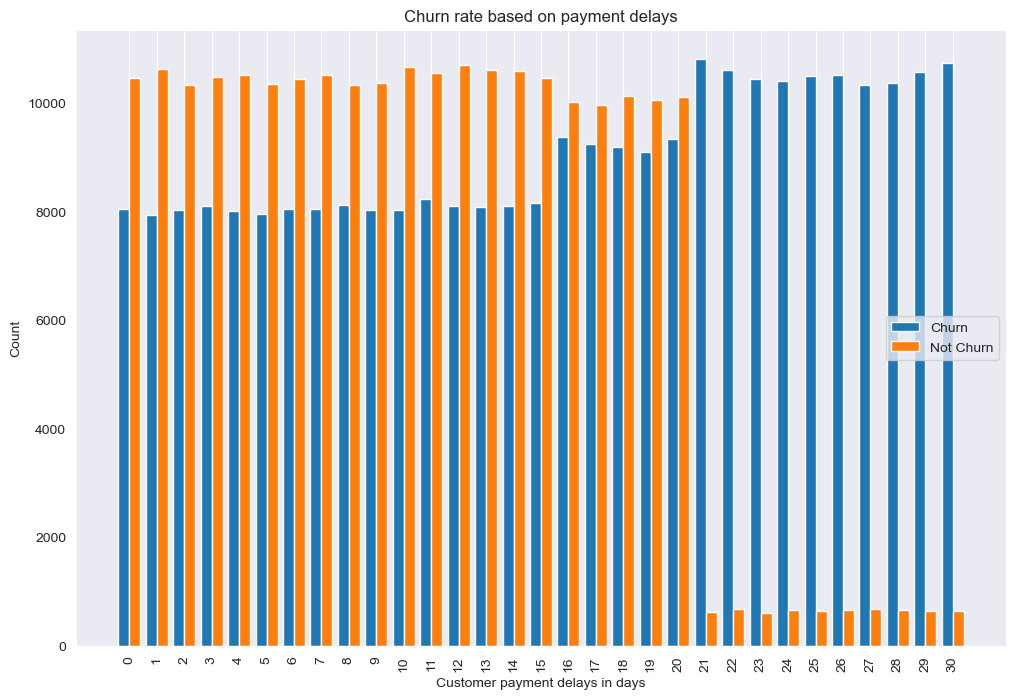

In [83]:
X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))
plt.figure(figsize=(12, 8))

plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')

plt.xticks(X_axis, X, rotation=90)
plt.xlabel("Customer payment delays in days")
plt.ylabel('Count')
plt.title("Churn rate based on payment delays")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

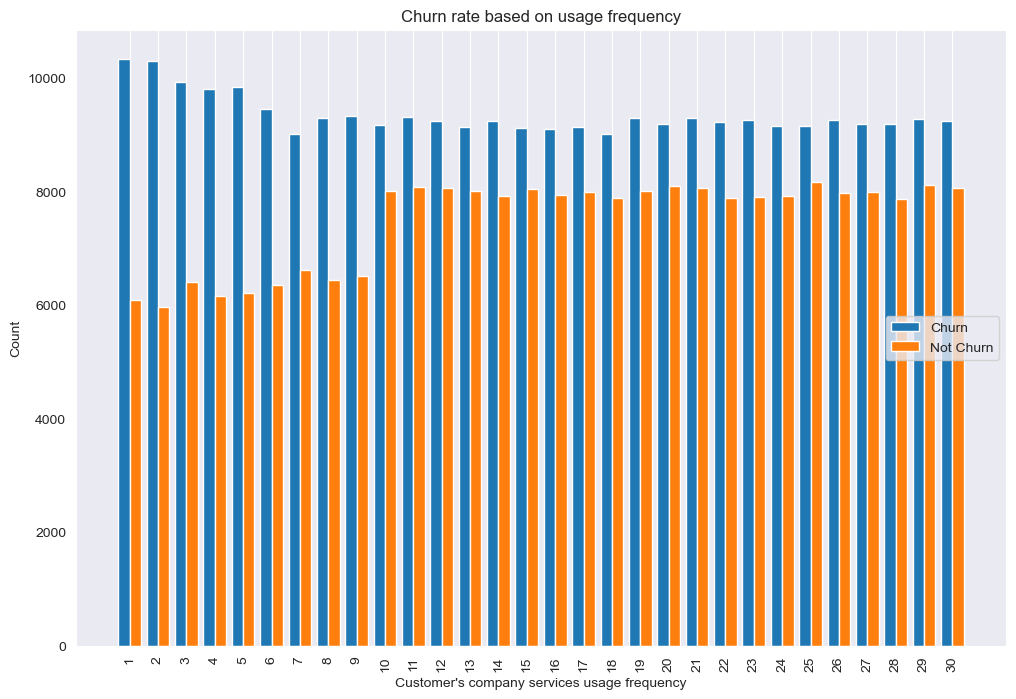

In [84]:
filtered = df.groupby(['usage_frequency', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))
plt.figure(figsize=(12, 8))

plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=90)
plt.xlabel("Customer's company services usage frequency")
plt.ylabel('Count')
plt.title("Churn rate based on usage frequency")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

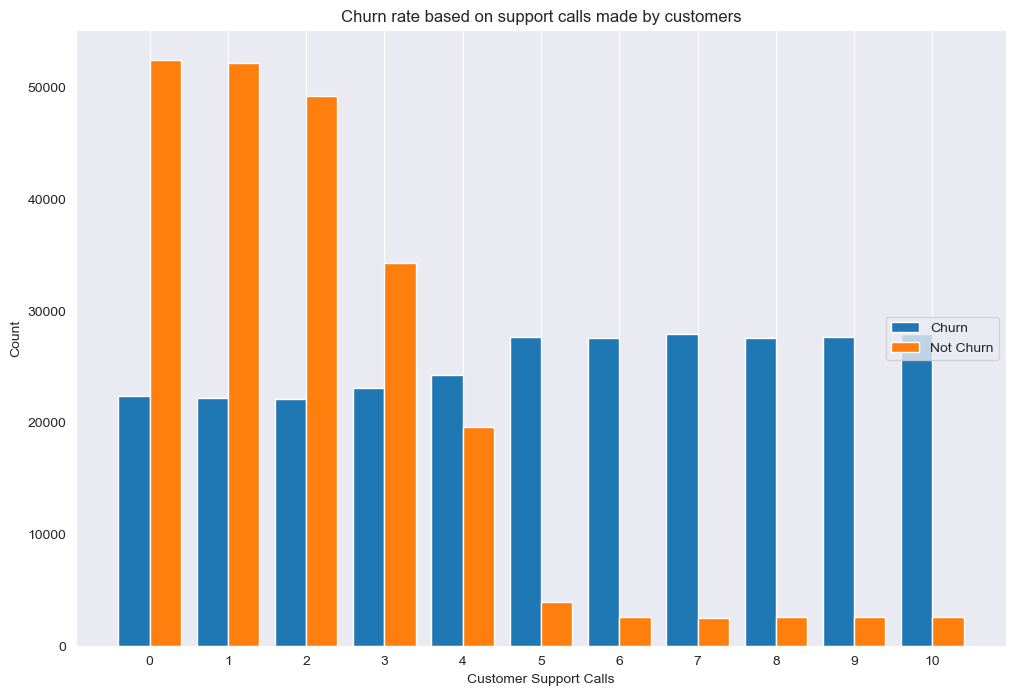

In [85]:
filtered = df.groupby(['support_calls', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))
plt.figure(figsize=(12, 8))
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X)
plt.xlabel('Customer Support Calls')
plt.ylabel('Count')
plt.title("Churn rate based on support calls made by customers")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

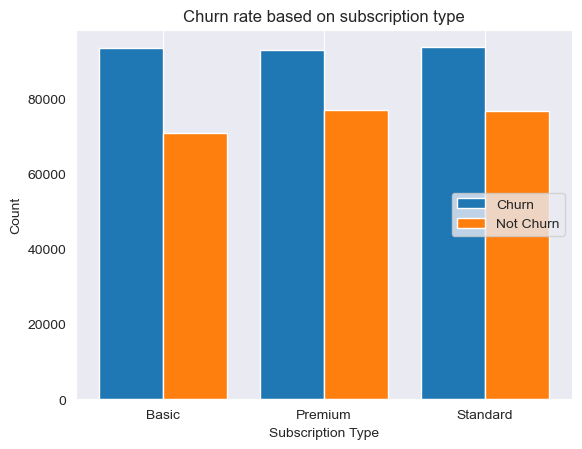

In [87]:
filtered = df.groupby(['subscription_type', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X)
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.title("Churn rate based on subscription type")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

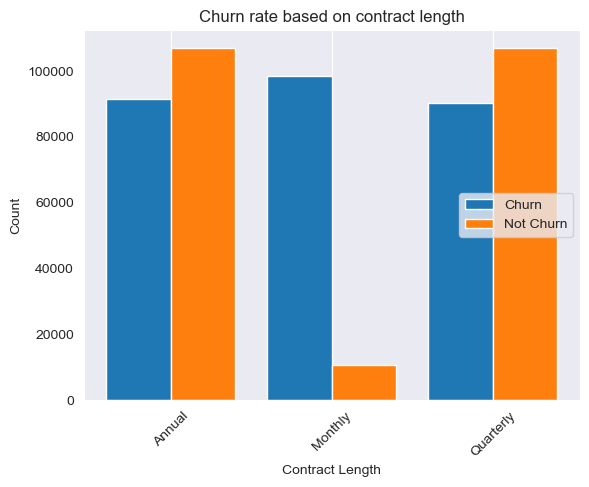

In [88]:
filtered = df.groupby(['contract_length','churn']).size().unstack()
X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])

X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Contract Length')
plt.ylabel('Count')
plt.title("Churn rate based on contract length")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

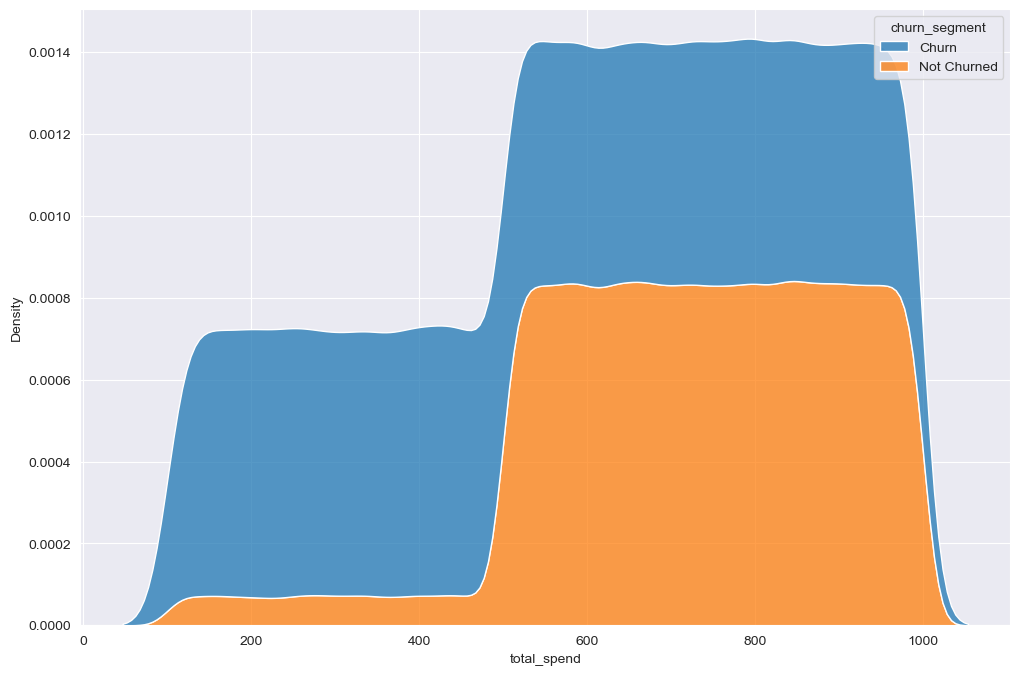

In [89]:
filtered = df.copy()
filtered['churn_segment'] = ['Churn' if x == 1.0 else 'Not Churned' for x in df['churn']]
plt.figure(figsize=(12,8))
sns.kdeplot(data=filtered, x="total_spend", hue="churn_segment", multiple="stack")
plt.show()

## Independent Features Correlation

In [93]:
ind_feat_df = df.select_dtypes(include=['number']).copy().drop(columns=['churn'])
ind_feat_df

,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction
0,30,39,14,5,18,932.0,17
1,65,49,1,10,8,557.0,6
2,55,14,4,6,18,185.0,3
3,58,38,21,7,7,396.0,29
4,23,32,20,5,8,617.0,20
...,...,...,...,...,...,...,...
64369,45,33,12,6,21,947.0,14
64370,37,6,1,5,22,923.0,9
64371,25,39,14,8,30,327.0,20
64372,50,18,19,7,22,540.0,13


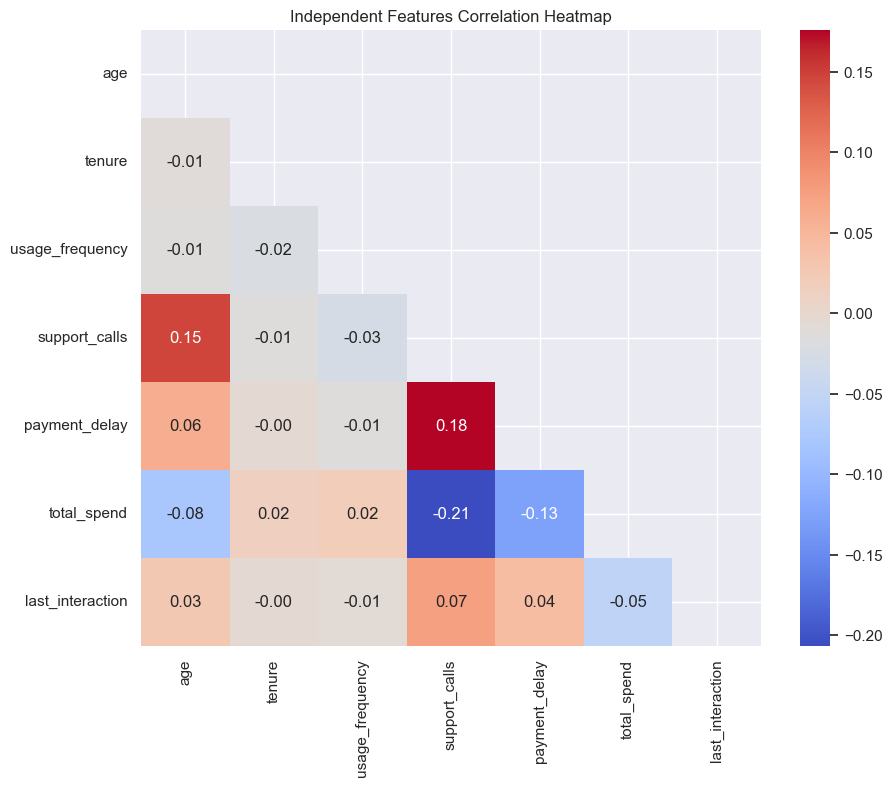

In [94]:
corr_matrix = ind_feat_df.corr()

mask = np.triu(np.ones_like(corr_matrix,dtype=bool))

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.0)
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm',mask=mask)
plt.title("Independent Features Correlation Heatmap")
plt.show()

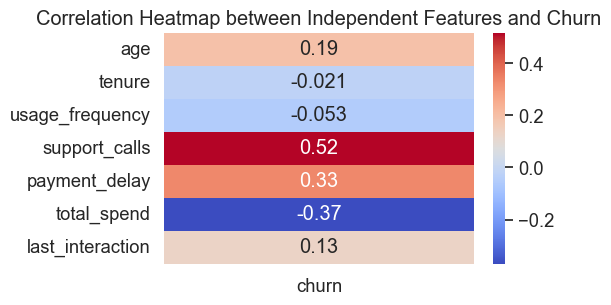

In [95]:
correlation_data = df.select_dtypes(include=['number']).corr().loc[:'last_interaction', 'churn']


# Create a heatmap
plt.figure(figsize=(5, 3))
sns.set(font_scale=1.2)
sns.heatmap(correlation_data.to_frame(), annot=True, cmap="coolwarm", cbar=True)

plt.title("Correlation Heatmap between Independent Features and Churn")
plt.show()

In [97]:
df.to_csv('customer_data.csv', index=False)